# Van der Pol Oscillator, Limit Cycles & Strange Attractors

This notebook demonstrates:
1. **Van der Pol Equation** – a classic nonlinear oscillator
2. **Limit Cycles** – stable periodic orbits in phase space
3. **Strange Attractors** – chaotic dynamics (Lorenz, Rössler)

We use **NumPy / SciPy** for numerical integration, **Matplotlib** for static plots, and **Manim Community** for animated 3D visualizations.

In [1]:
# Core imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp

%matplotlib inline
plt.rcParams['figure.dpi'] = 120

---
## 1. Van der Pol Oscillator

### Equation
$$\frac{d^2 x}{dt^2} - \mu (1 - x^2) \frac{dx}{dt} + x = 0$$

Rewritten as a first-order system with $y = \dot{x}$:
$$\dot{x} = y, \quad \dot{y} = \mu (1 - x^2) y - x$$

When $\mu > 0$ the system exhibits a **limit cycle** – trajectories spiral toward a closed orbit regardless of starting point.

In [2]:
def van_der_pol(t, state, mu=1.0):
    """Van der Pol ODE system."""
    x, y = state
    dxdt = y
    dydt = mu * (1 - x**2) * y - x
    return [dxdt, dydt]

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_16465/3941889858.py:17: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\dot{x}$')


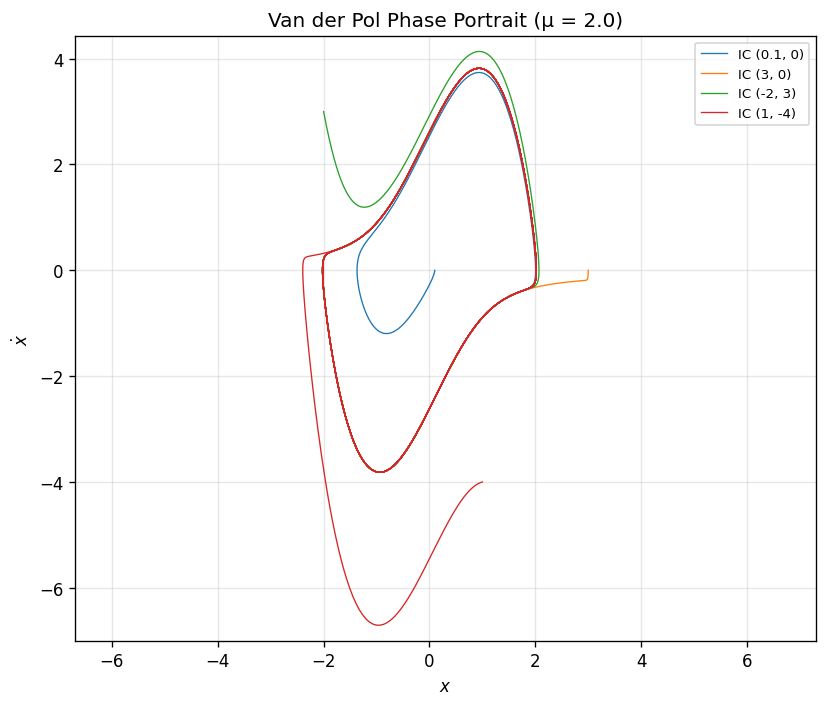

In [3]:
# Integrate Van der Pol for several initial conditions
mu = 2.0
t_span = (0, 40)
t_eval = np.linspace(*t_span, 4000)

initial_conditions = [(0.1, 0), (3, 0), (-2, 3), (1, -4)]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, ax = plt.subplots(figsize=(7, 6))
for (x0, y0), col in zip(initial_conditions, colors):
    sol = solve_ivp(van_der_pol, t_span, [x0, y0], args=(mu,),
                    dense_output=True, max_step=0.01)
    xy = sol.sol(t_eval)
    ax.plot(xy[0], xy[1], lw=0.8, color=col, label=f'IC ({x0}, {y0})')

ax.set_xlabel('$x$')
ax.set_ylabel('$\dot{x}$')
ax.set_title(f'Van der Pol Phase Portrait (μ = {mu})')
ax.legend(loc='upper right', fontsize=8)
ax.set_aspect('equal', 'datalim')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

All trajectories converge to the same **limit cycle** — the hallmark of this nonlinear oscillator.

---
## 1.1 Deep Dive: Variables, Phase Space, and Equilibrium Analysis

### Clarifying the Variables

Let's be **very explicit** about what each variable represents:

| Symbol | Name | Physical Meaning | Units (dimensionless) |
|--------|------|------------------|----------------------|
| $t$ | Time | Independent variable | Time units |
| $x(t)$ | Position/State | The primary dynamical variable (e.g., displacement, voltage) | Position units |
| $y(t) = \dot{x}(t) = \frac{dx}{dt}$ | Velocity | Rate of change of $x$ | Position/Time |
| $\mu$ | Nonlinearity parameter | Controls damping strength and limit cycle shape | Dimensionless |

### The Phase Space $(x, y)$

The **phase space** (or **phase plane**) is a 2D space where:
- **Horizontal axis**: $x$ — the position/state variable
- **Vertical axis**: $y = \dot{x}$ — the velocity (time derivative of $x$)

Each point $(x, y)$ represents a complete **state** of the system at an instant. A trajectory is a curve $(x(t), y(t))$ showing how the state evolves.

**Key insight**: We plot $\dot{x}$ vs $x$, NOT $x$ vs $t$. This removes time and shows the **geometry of dynamics**.

### Finding Equilibrium Points (Fixed Points)

An **equilibrium point** (or **fixed point**) is where the system doesn't change: $\dot{x} = 0$ AND $\dot{y} = 0$.

For the Van der Pol system:
$$\dot{x} = y = 0$$
$$\dot{y} = \mu(1 - x^2)y - x = 0$$

**Solving simultaneously:**
1. From $\dot{x} = 0$: $y = 0$
2. Substituting into $\dot{y} = 0$: $\mu(1 - x^2)(0) - x = -x = 0 \Rightarrow x = 0$

**Result: There is exactly ONE equilibrium point at $(x^*, y^*) = (0, 0)$** — the origin.

This is fundamentally different from systems with multiple equilibria (like the pendulum with saddles and centers).

### Stability Analysis via Linearization (Jacobian)

To classify the equilibrium, we **linearize** around $(0, 0)$ using the Jacobian matrix.

The system is:
$$\dot{x} = f(x, y) = y$$
$$\dot{y} = g(x, y) = \mu(1 - x^2)y - x$$

The **Jacobian matrix** is:
$$J = \begin{pmatrix} \frac{\partial f}{\partial x} & \frac{\partial f}{\partial y} \\ \frac{\partial g}{\partial x} & \frac{\partial g}{\partial y} \end{pmatrix} = \begin{pmatrix} 0 & 1 \\ -2\mu xy - 1 & \mu(1 - x^2) \end{pmatrix}$$

**At the origin $(0, 0)$:**
$$J_{(0,0)} = \begin{pmatrix} 0 & 1 \\ -1 & \mu \end{pmatrix}$$

**Eigenvalue analysis:**
$$\det(J - \lambda I) = \lambda^2 - \mu\lambda + 1 = 0$$
$$\lambda = \frac{\mu \pm \sqrt{\mu^2 - 4}}{2}$$

| $\mu$ range | Eigenvalues | Classification |
|-------------|-------------|----------------|
| $\mu = 0$ | $\lambda = \pm i$ | **Center** (purely imaginary) |
| $0 < \mu < 2$ | $\lambda = \frac{\mu}{2} \pm i\sqrt{1 - \frac{\mu^2}{4}}$ | **Unstable spiral** (Re > 0) |
| $\mu = 2$ | $\lambda = 1$ (repeated) | **Unstable degenerate node** |
| $\mu > 2$ | Both real, positive | **Unstable node** |

**Key result:** For $\mu > 0$, the origin is **always unstable** — trajectories spiral outward!

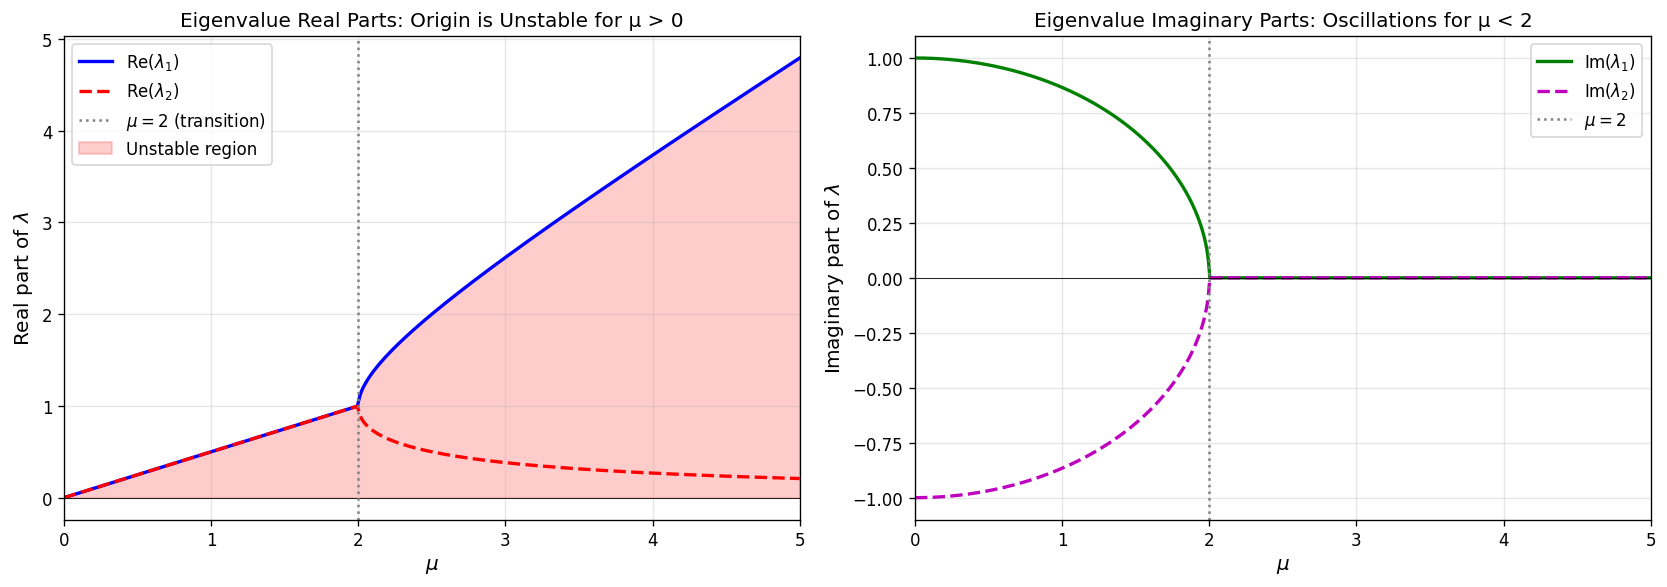

Classification of the origin (0, 0):
  • μ = 0: Center (neutral stability)
  • 0 < μ < 2: Unstable spiral (complex eigenvalues with Re > 0)
  • μ = 2: Degenerate unstable node
  • μ > 2: Unstable node (real positive eigenvalues)


In [3]:
# Compute and visualize eigenvalues as a function of μ
import numpy as np
import matplotlib.pyplot as plt

mu_values = np.linspace(0, 5, 500)
eigenvalues_real = []
eigenvalues_imag = []

for mu in mu_values:
    # Jacobian at origin: [[0, 1], [-1, μ]]
    # Eigenvalues: λ = (μ ± √(μ² - 4)) / 2
    discriminant = mu**2 - 4
    
    if discriminant < 0:
        # Complex eigenvalues
        real_part = mu / 2
        imag_part = np.sqrt(-discriminant) / 2
        eigenvalues_real.append((real_part, real_part))
        eigenvalues_imag.append((imag_part, -imag_part))
    else:
        # Real eigenvalues
        sqrt_disc = np.sqrt(discriminant)
        lambda1 = (mu + sqrt_disc) / 2
        lambda2 = (mu - sqrt_disc) / 2
        eigenvalues_real.append((lambda1, lambda2))
        eigenvalues_imag.append((0, 0))

eigenvalues_real = np.array(eigenvalues_real)
eigenvalues_imag = np.array(eigenvalues_imag)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Real parts
ax1 = axes[0]
ax1.plot(mu_values, eigenvalues_real[:, 0], 'b-', lw=2, label=r'$\mathrm{Re}(\lambda_1)$')
ax1.plot(mu_values, eigenvalues_real[:, 1], 'r--', lw=2, label=r'$\mathrm{Re}(\lambda_2)$')
ax1.axhline(y=0, color='black', linestyle='-', lw=0.5)
ax1.axvline(x=2, color='gray', linestyle=':', lw=1.5, label=r'$\mu = 2$ (transition)')
ax1.fill_between(mu_values, 0, eigenvalues_real[:, 0], alpha=0.2, color='red', 
                  where=eigenvalues_real[:, 0] > 0, label='Unstable region')
ax1.set_xlabel(r'$\mu$', fontsize=12)
ax1.set_ylabel(r'Real part of $\lambda$', fontsize=12)
ax1.set_title('Eigenvalue Real Parts: Origin is Unstable for μ > 0')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 5)

# Right: Imaginary parts
ax2 = axes[1]
ax2.plot(mu_values, eigenvalues_imag[:, 0], 'g-', lw=2, label=r'$\mathrm{Im}(\lambda_1)$')
ax2.plot(mu_values, eigenvalues_imag[:, 1], 'm--', lw=2, label=r'$\mathrm{Im}(\lambda_2)$')
ax2.axhline(y=0, color='black', linestyle='-', lw=0.5)
ax2.axvline(x=2, color='gray', linestyle=':', lw=1.5, label=r'$\mu = 2$')
ax2.set_xlabel(r'$\mu$', fontsize=12)
ax2.set_ylabel(r'Imaginary part of $\lambda$', fontsize=12)
ax2.set_title('Eigenvalue Imaginary Parts: Oscillations for μ < 2')
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 5)

plt.tight_layout()
plt.show()

print("Classification of the origin (0, 0):")
print("  • μ = 0: Center (neutral stability)")
print("  • 0 < μ < 2: Unstable spiral (complex eigenvalues with Re > 0)")
print("  • μ = 2: Degenerate unstable node")
print("  • μ > 2: Unstable node (real positive eigenvalues)")

### The Nullclines: Where Does Each Variable Stop Changing?

**Nullclines** are curves where one component of velocity is zero:

- **x-nullcline** ($\dot{x} = 0$): $y = 0$ — the horizontal axis
- **y-nullcline** ($\dot{y} = 0$): $\mu(1-x^2)y - x = 0 \Rightarrow y = \frac{x}{\mu(1-x^2)}$ — a cubic curve

**Interpretation:**
- On the x-nullcline: trajectories move purely vertically (only $y$ changes)
- On the y-nullcline: trajectories move purely horizontally (only $x$ changes)
- **Equilibria occur where nullclines intersect!**

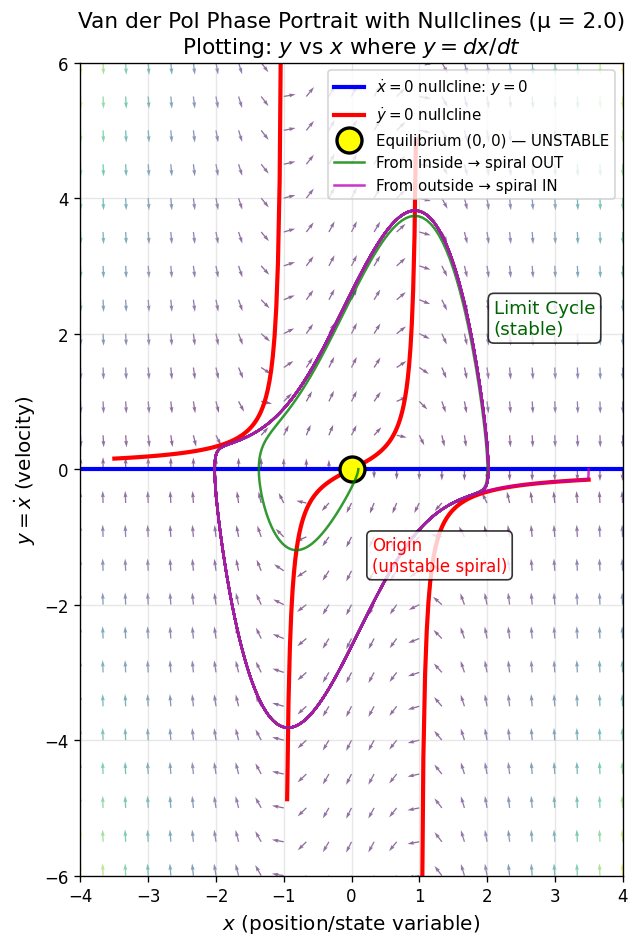


Phase Portrait Interpretation:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Blue line (y=0): x-nullcline — trajectories cross vertically
• Red curve: y-nullcline — trajectories cross horizontally
• Yellow dot: The ONLY equilibrium at origin (unstable)
• Green trajectory: Starts near origin, spirals outward
• Magenta trajectory: Starts far away, spirals inward
• Both converge to the same LIMIT CYCLE!


In [4]:
# Visualize nullclines, vector field, equilibrium, and regions
mu = 2.0

fig, ax = plt.subplots(figsize=(10, 8))

# Create a grid for the vector field
x_range = np.linspace(-4, 4, 25)
y_range = np.linspace(-6, 6, 25)
X, Y = np.meshgrid(x_range, y_range)

# Vector field components
U = Y                              # dx/dt = y
V = mu * (1 - X**2) * Y - X        # dy/dt = μ(1-x²)y - x

# Normalize for better visualization
magnitude = np.sqrt(U**2 + V**2)
U_norm = U / (magnitude + 0.1)
V_norm = V / (magnitude + 0.1)

# Plot vector field
ax.quiver(X, Y, U_norm, V_norm, magnitude, cmap='viridis', alpha=0.6)

# X-nullcline: y = 0 (horizontal axis)
ax.axhline(y=0, color='blue', linewidth=2.5, label=r'$\dot{x} = 0$ nullcline: $y = 0$')

# Y-nullcline: y = x / (μ(1-x²)) — has vertical asymptotes at x = ±1
x_null_left = np.linspace(-3.5, -1.01, 100)
x_null_mid = np.linspace(-0.99, 0.99, 100)
x_null_right = np.linspace(1.01, 3.5, 100)

def y_nullcline(x, mu):
    return x / (mu * (1 - x**2))

for x_seg in [x_null_left, x_null_mid, x_null_right]:
    y_seg = y_nullcline(x_seg, mu)
    # Clip to visible range
    mask = np.abs(y_seg) < 8
    ax.plot(x_seg[mask], y_seg[mask], 'r-', linewidth=2.5, 
            label=r'$\dot{y} = 0$ nullcline' if x_seg is x_null_left else '')

# Mark the equilibrium point
ax.plot(0, 0, 'ko', markersize=15, markerfacecolor='yellow', markeredgewidth=2,
        label='Equilibrium (0, 0) — UNSTABLE')

# Add trajectories to show the limit cycle
t_span = (0, 50)
t_eval = np.linspace(*t_span, 3000)

# Trajectory from inside
sol_in = solve_ivp(van_der_pol, t_span, [0.1, 0], args=(mu,), 
                   dense_output=True, max_step=0.01)
xy_in = sol_in.sol(t_eval)
ax.plot(xy_in[0], xy_in[1], 'g-', lw=1.5, alpha=0.8, label='From inside → spiral OUT')

# Trajectory from outside  
sol_out = solve_ivp(van_der_pol, t_span, [3.5, 0], args=(mu,),
                    dense_output=True, max_step=0.01)
xy_out = sol_out.sol(t_eval)
ax.plot(xy_out[0], xy_out[1], 'm-', lw=1.5, alpha=0.8, label='From outside → spiral IN')

# Labels and formatting
ax.set_xlabel(r'$x$ (position/state variable)', fontsize=12)
ax.set_ylabel(r'$y = \dot{x}$ (velocity)', fontsize=12)
ax.set_title(f'Van der Pol Phase Portrait with Nullclines (μ = {mu})\n'
             r'Plotting: $y$ vs $x$ where $y = dx/dt$', fontsize=13)
ax.set_xlim(-4, 4)
ax.set_ylim(-6, 6)
ax.legend(loc='upper right', fontsize=9)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

# Add annotations for regions
ax.annotate('Limit Cycle\n(stable)', xy=(2.1, 2), fontsize=11, color='darkgreen',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
ax.annotate('Origin\n(unstable spiral)', xy=(0.3, -1.5), fontsize=10, color='red',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print("\nPhase Portrait Interpretation:")
print("━" * 50)
print("• Blue line (y=0): x-nullcline — trajectories cross vertically")
print("• Red curve: y-nullcline — trajectories cross horizontally")
print("• Yellow dot: The ONLY equilibrium at origin (unstable)")
print("• Green trajectory: Starts near origin, spirals outward")
print("• Magenta trajectory: Starts far away, spirals inward")
print("• Both converge to the same LIMIT CYCLE!")

### Regions in Phase Space: The Liénard Plane Perspective

The Van der Pol equation can be written in **Liénard form**:
$$\ddot{x} + f(x)\dot{x} + g(x) = 0$$

where $f(x) = -\mu(1-x^2)$ and $g(x) = x$.

**Key regions based on the damping term $f(x) = -\mu(1-x^2)$:**

| Region | Condition | Damping behavior |
|--------|-----------|------------------|
| $|x| < 1$ | $1 - x^2 > 0$ | **Negative damping** (energy pumped IN) |
| $|x| > 1$ | $1 - x^2 < 0$ | **Positive damping** (energy dissipated) |
| $|x| = 1$ | $1 - x^2 = 0$ | Zero damping (transition) |

This explains the limit cycle: 
- Near origin ($|x| < 1$): Energy is added → trajectories spiral outward
- Far from origin ($|x| > 1$): Energy is removed → trajectories spiral inward
- The limit cycle exists where these balance!

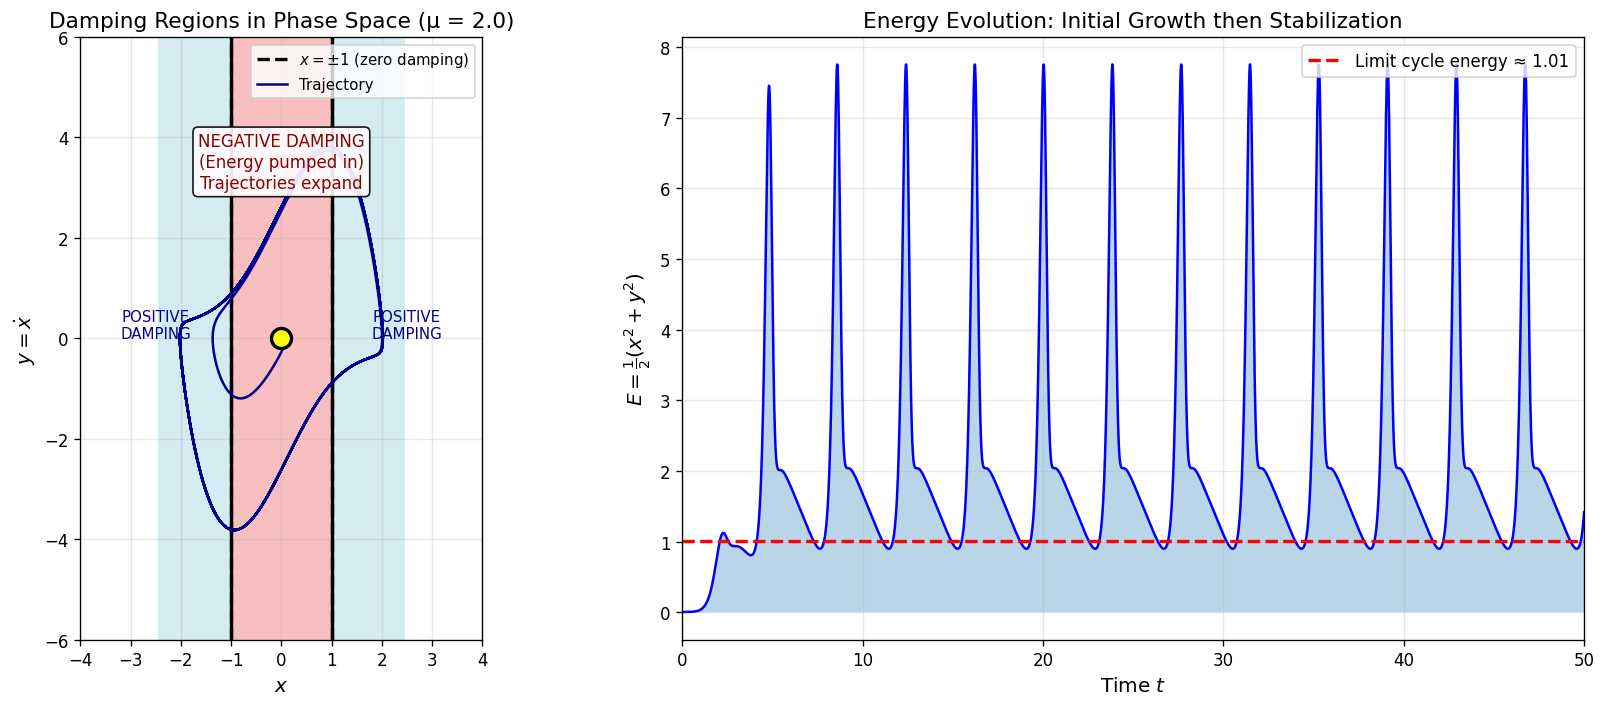


Energy Interpretation:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Starting near origin: E is small, negative damping adds energy
• E grows as trajectory spirals outward
• Eventually |x| > 1 region dominates → energy dissipation
• Equilibrium reached: energy input = energy dissipation → LIMIT CYCLE


In [5]:
# Visualize the damping regions with color coding
mu = 2.0

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Left: Phase portrait with damping regions highlighted
ax1 = axes[0]

# Create filled regions
x_fill = np.linspace(-4, 4, 500)
y_fill = np.linspace(-6, 6, 500)
X_fill, Y_fill = np.meshgrid(x_fill, y_fill)

# Damping coefficient: -μ(1-x²)  
# Negative damping (energy in) when |x| < 1
# Positive damping (energy out) when |x| > 1
damping = -mu * (1 - X_fill**2)

# Plot damping regions
im = ax1.contourf(X_fill, Y_fill, damping, levels=[-10, 0, 10], 
                   colors=['lightcoral', 'lightblue'], alpha=0.5)
ax1.contour(X_fill, Y_fill, damping, levels=[0], colors='black', linewidths=2)

# Add vertical lines at x = ±1
ax1.axvline(x=1, color='black', linestyle='--', lw=2, label=r'$x = \pm 1$ (zero damping)')
ax1.axvline(x=-1, color='black', linestyle='--', lw=2)

# Add trajectory
sol = solve_ivp(van_der_pol, (0, 50), [0.1, 0], args=(mu,), 
                dense_output=True, max_step=0.01)
t_eval = np.linspace(0, 50, 5000)
xy = sol.sol(t_eval)
ax1.plot(xy[0], xy[1], 'darkblue', lw=1.5, label='Trajectory')

# Equilibrium
ax1.plot(0, 0, 'ko', markersize=12, markerfacecolor='yellow', markeredgewidth=2)

# Annotations
ax1.annotate('NEGATIVE DAMPING\n(Energy pumped in)\nTrajectories expand', 
             xy=(0, 3), ha='center', fontsize=10, color='darkred',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
ax1.annotate('POSITIVE\nDAMPING', xy=(2.5, 0), ha='center', fontsize=9, color='darkblue')
ax1.annotate('POSITIVE\nDAMPING', xy=(-2.5, 0), ha='center', fontsize=9, color='darkblue')

ax1.set_xlabel(r'$x$', fontsize=12)
ax1.set_ylabel(r'$y = \dot{x}$', fontsize=12)
ax1.set_title(f'Damping Regions in Phase Space (μ = {mu})', fontsize=13)
ax1.set_xlim(-4, 4)
ax1.set_ylim(-6, 6)
ax1.legend(loc='upper right', fontsize=9)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)

# Right: Energy-like quantity over time
ax2 = axes[1]

# "Energy" for Van der Pol: E = (x² + y²)/2 (not conserved!)
energy = 0.5 * (xy[0]**2 + xy[1]**2)
t_plot = t_eval

ax2.plot(t_plot, energy, 'b-', lw=1.5)
ax2.axhline(y=energy[-100:].mean(), color='red', linestyle='--', lw=2, 
            label=f'Limit cycle energy ≈ {energy[-100:].mean():.2f}')
ax2.fill_between(t_plot, 0, energy, alpha=0.3)

ax2.set_xlabel('Time $t$', fontsize=12)
ax2.set_ylabel(r'$E = \frac{1}{2}(x^2 + y^2)$', fontsize=12)
ax2.set_title('Energy Evolution: Initial Growth then Stabilization', fontsize=13)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 50)

plt.tight_layout()
plt.show()

print("\nEnergy Interpretation:")
print("━" * 50)
print("• Starting near origin: E is small, negative damping adds energy")
print("• E grows as trajectory spirals outward")
print("• Eventually |x| > 1 region dominates → energy dissipation")
print("• Equilibrium reached: energy input = energy dissipation → LIMIT CYCLE")

### Uniqueness of Solutions: The Picard-Lindelöf Theorem

**Theorem (Existence and Uniqueness):** If the right-hand side of $\dot{\mathbf{x}} = \mathbf{F}(\mathbf{x}, t)$ is **Lipschitz continuous** in $\mathbf{x}$, then:
1. A solution exists for any initial condition
2. The solution is **unique** — trajectories never cross!

For Van der Pol:
$$\mathbf{F}(x, y) = \begin{pmatrix} y \\ \mu(1-x^2)y - x \end{pmatrix}$$

This is a polynomial in $(x, y)$, hence **smooth** and Lipschitz on any bounded domain.

**Consequence:** In the phase plane, trajectories **never intersect** (except at equilibria where the flow stops). This is why the limit cycle is a true barrier — trajectories inside stay inside (spiraling out to it), trajectories outside stay outside (spiraling in to it).

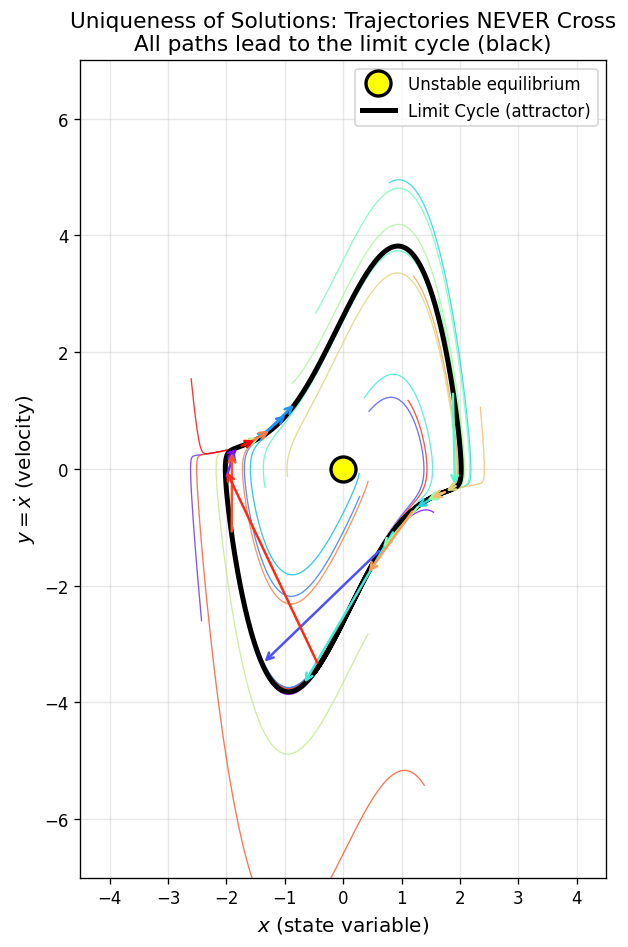


Key Observations:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Each colored trajectory follows a unique path
• NO TWO TRAJECTORIES EVER CROSS (uniqueness theorem!)
• All trajectories asymptotically approach the black limit cycle
• The limit cycle is a 'basin boundary' — trajectories wrap around it


In [6]:
# Demonstrate uniqueness: many trajectories, none crossing
mu = 2.0

fig, ax = plt.subplots(figsize=(10, 8))

# Generate many trajectories from different initial conditions
np.random.seed(42)
n_trajectories = 20
colors_traj = plt.cm.rainbow(np.linspace(0, 1, n_trajectories))

for i in range(n_trajectories):
    # Random initial conditions
    r = np.random.uniform(0.2, 4)
    theta = np.random.uniform(0, 2*np.pi)
    x0, y0 = r * np.cos(theta), r * np.sin(theta) * 1.5
    
    sol = solve_ivp(van_der_pol, (0, 30), [x0, y0], args=(mu,),
                    dense_output=True, max_step=0.01)
    t_eval = np.linspace(0, 30, 2000)
    xy = sol.sol(t_eval)
    
    # Plot with arrow to show direction
    ax.plot(xy[0], xy[1], color=colors_traj[i], lw=0.8, alpha=0.8)
    # Add arrow at midpoint
    mid = len(xy[0]) // 3
    ax.annotate('', xy=(xy[0][mid+50], xy[1][mid+50]), 
                xytext=(xy[0][mid], xy[1][mid]),
                arrowprops=dict(arrowstyle='->', color=colors_traj[i], lw=1.5))

# Mark equilibrium
ax.plot(0, 0, 'ko', markersize=15, markerfacecolor='yellow', markeredgewidth=2,
        label='Unstable equilibrium')

# Compute and plot the limit cycle (long-time trajectory)
sol_lc = solve_ivp(van_der_pol, (0, 100), [0.1, 0], args=(mu,),
                   dense_output=True, max_step=0.01)
t_lc = np.linspace(90, 100, 1000)  # Last portion = limit cycle
xy_lc = sol_lc.sol(t_lc)
ax.plot(xy_lc[0], xy_lc[1], 'k-', lw=3, label='Limit Cycle (attractor)')

ax.set_xlabel(r'$x$ (state variable)', fontsize=12)
ax.set_ylabel(r'$y = \dot{x}$ (velocity)', fontsize=12)
ax.set_title('Uniqueness of Solutions: Trajectories NEVER Cross\n'
             'All paths lead to the limit cycle (black)', fontsize=13)
ax.set_xlim(-4.5, 4.5)
ax.set_ylim(-7, 7)
ax.legend(loc='upper right', fontsize=10)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("━" * 50)
print("• Each colored trajectory follows a unique path")
print("• NO TWO TRAJECTORIES EVER CROSS (uniqueness theorem!)")
print("• All trajectories asymptotically approach the black limit cycle")
print("• The limit cycle is a 'basin boundary' — trajectories wrap around it")

### Summary: Complete Phase Space Analysis

| Feature | Van der Pol Oscillator |
|---------|------------------------|
| **State space** | 2D: $(x, y)$ where $y = \dot{x}$ |
| **Equilibrium points** | Only ONE: origin $(0, 0)$ |
| **Stability of origin** | **Unstable** (spiral for $0 < \mu < 2$, node for $\mu > 2$) |
| **Limit cycle** | **Stable** — globally attracting for all $\mu > 0$ |
| **Nullclines** | $\dot{x}=0$: $y=0$; $\dot{y}=0$: cubic curve |
| **Key regions** | $|x|<1$: negative damping; $|x|>1$: positive damping |
| **Uniqueness** | ✓ Guaranteed by Picard-Lindelöf (smooth vector field) |

**The Van der Pol oscillator is a canonical example of a self-sustained oscillation** — the limit cycle emerges from the interplay between energy injection (near origin) and dissipation (far from origin).

---
## 2. Effect of the Damping Parameter μ

Increasing μ makes the oscillation more "relaxation-like" (slow charge, fast discharge).

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_16465/925761392.py:11: SyntaxWarning: invalid escape sequence '\d'
  ax.set_ylabel('$\dot{x}$')


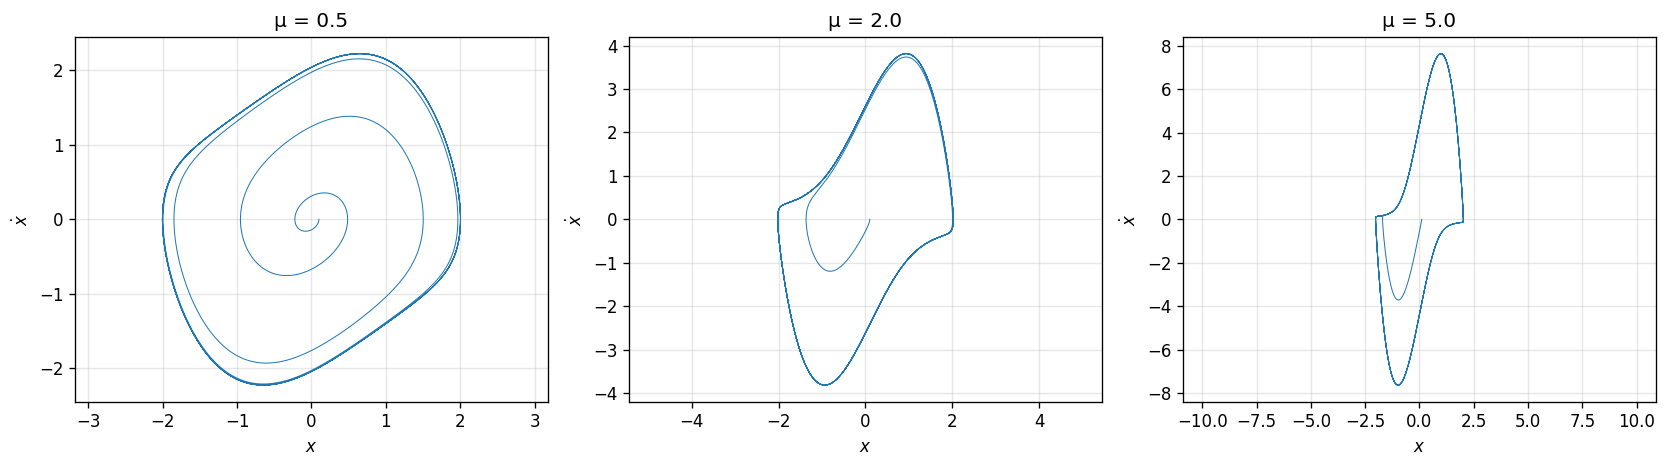

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, mu in zip(axes, [0.5, 2.0, 5.0]):
    sol = solve_ivp(van_der_pol, (0, 50), [0.1, 0], args=(mu,),
                    dense_output=True, max_step=0.01)
    t_eval = np.linspace(0, 50, 5000)
    xy = sol.sol(t_eval)
    ax.plot(xy[0], xy[1], lw=0.6)
    ax.set_title(f'μ = {mu}')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$\dot{x}$')
    ax.set_aspect('equal', 'datalim')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
## 3. Strange Attractors — Lorenz System

The **Lorenz system** is a prototypical chaotic attractor:
$$\dot{x} = \sigma (y - x), \quad \dot{y} = x(\rho - z) - y, \quad \dot{z} = xy - \beta z$$

Canonical parameters: $\sigma = 10$, $\rho = 28$, $\beta = 8/3$.

In [5]:
def lorenz(t, state, sigma=10.0, rho=28.0, beta=8/3):
    x, y, z = state
    return [
        sigma * (y - x),
        x * (rho - z) - y,
        x * y - beta * z
    ]

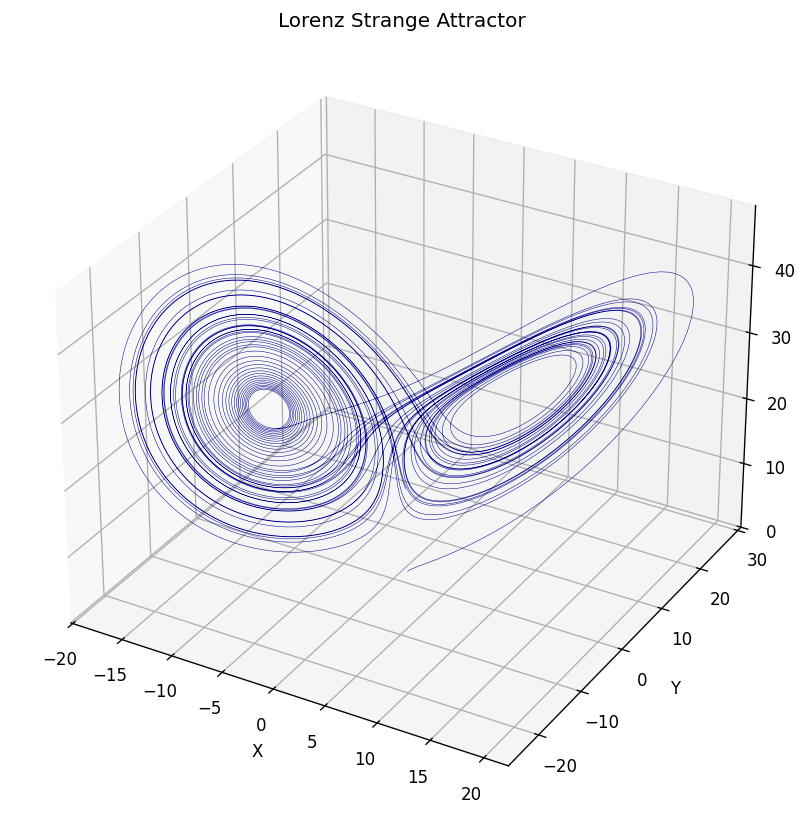

In [6]:
t_span = (0, 50)
sol = solve_ivp(lorenz, t_span, [1.0, 1.0, 1.0],
                dense_output=True, max_step=0.01)
t_eval = np.linspace(*t_span, 15000)
xyz = sol.sol(t_eval)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xyz[0], xyz[1], xyz[2], lw=0.3, color='darkblue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Strange Attractor')
plt.tight_layout()
plt.show()

---
## 4. Rössler Attractor

Another classic strange attractor, simpler than Lorenz:
$$\dot{x} = -y - z, \quad \dot{y} = x + ay, \quad \dot{z} = b + z(x - c)$$

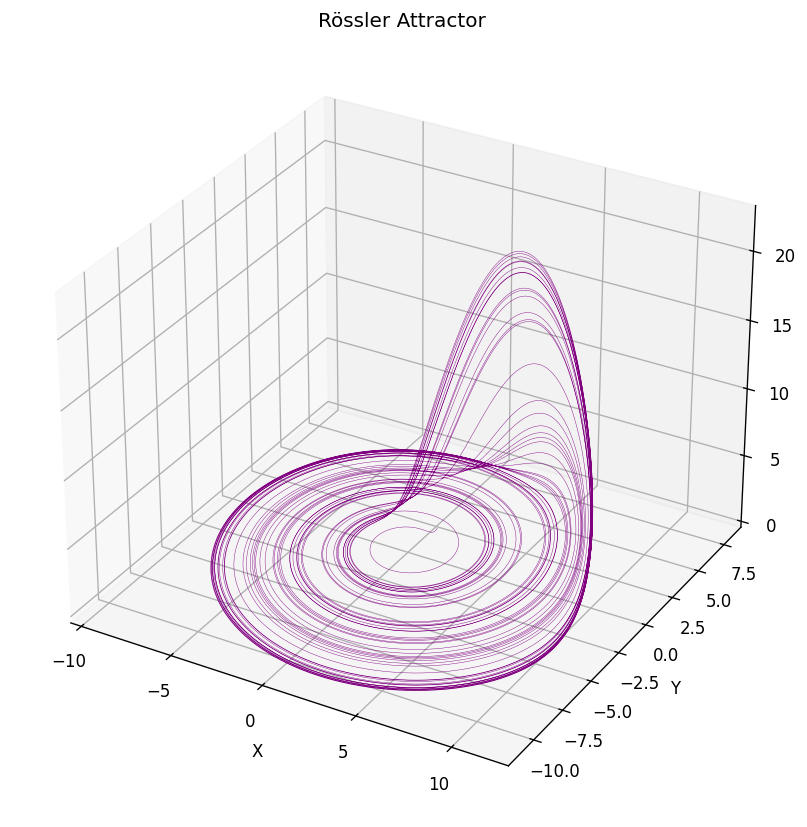

In [7]:
def rossler(t, state, a=0.2, b=0.2, c=5.7):
    x, y, z = state
    return [-y - z, x + a*y, b + z*(x - c)]

sol = solve_ivp(rossler, (0, 300), [1, 1, 1],
                dense_output=True, max_step=0.05)
t_eval = np.linspace(0, 300, 30000)
xyz = sol.sol(t_eval)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(xyz[0], xyz[1], xyz[2], lw=0.25, color='purple')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rössler Attractor')
plt.tight_layout()
plt.show()

---
## 5. Deep Dive: The Lorenz Model

### Historical Context
In 1963, Edward Lorenz discovered chaos while studying atmospheric convection. His simplified model became the archetype of deterministic chaos:

$$\dot{x} = \sigma (y - x), \quad \dot{y} = x(\rho - z) - y, \quad \dot{z} = xy - \beta z$$

**Parameters:**
- $\sigma$ (Prandtl number) — ratio of kinematic viscosity to thermal diffusivity
- $\rho$ (Rayleigh number) — driving force (temperature difference)
- $\beta$ — geometric factor

**Key insight:** For $\rho > 24.74$ (approx.), the system exhibits chaotic behavior — tiny differences in initial conditions lead to wildly different trajectories.

### Sensitive Dependence on Initial Conditions ("Butterfly Effect")

Let's see two trajectories that start infinitesimally close but diverge exponentially:

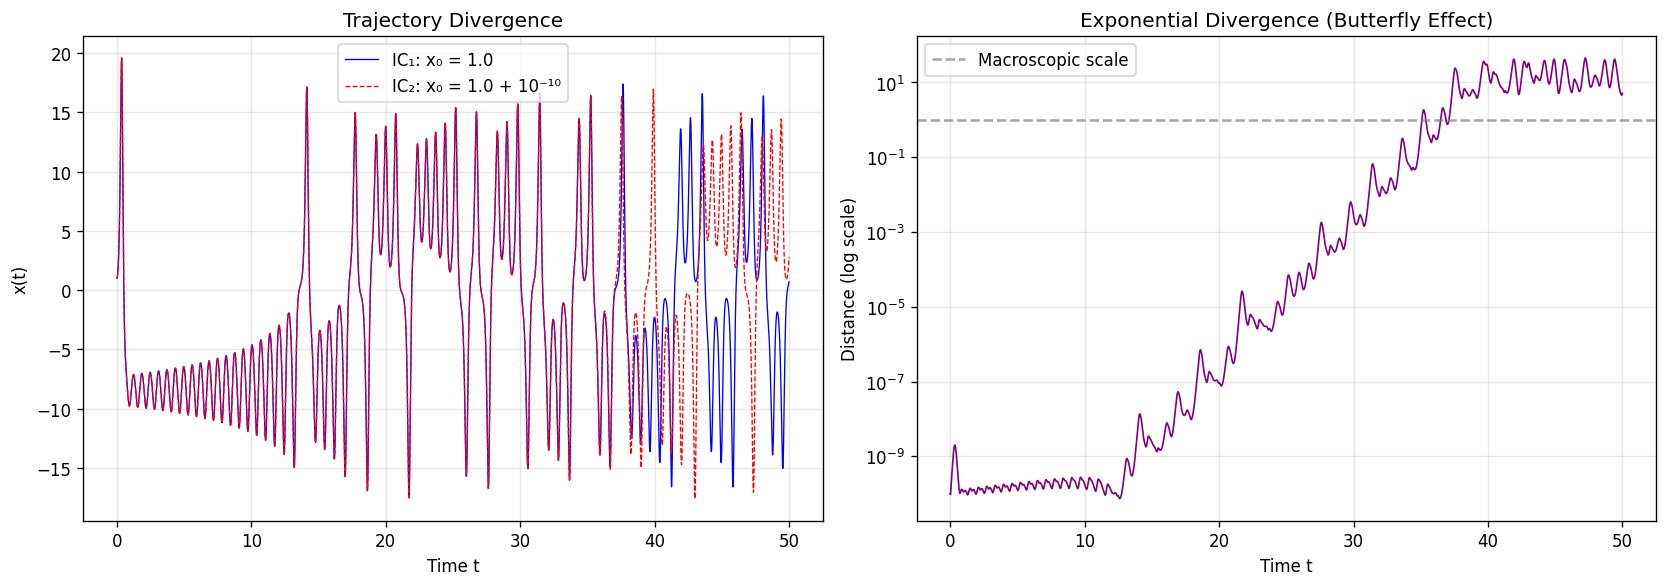

Initial separation: 1.00e-10
Final separation:   5.13


In [8]:
# Sensitive dependence on initial conditions
def lorenz(t, state, sigma=10.0, rho=28.0, beta=8/3):
    x, y, z = state
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Two trajectories with TINY difference in initial conditions
ic1 = [1.0, 1.0, 1.0]
ic2 = [1.0 + 1e-10, 1.0, 1.0]  # Difference of 10^-10 in x!

t_span = (0, 50)
t_eval = np.linspace(*t_span, 10000)

sol1 = solve_ivp(lorenz, t_span, ic1, dense_output=True, max_step=0.01)
sol2 = solve_ivp(lorenz, t_span, ic2, dense_output=True, max_step=0.01)

traj1 = sol1.sol(t_eval)
traj2 = sol2.sol(t_eval)

# Compute distance between trajectories over time
distance = np.sqrt((traj1[0] - traj2[0])**2 + (traj1[1] - traj2[1])**2 + (traj1[2] - traj2[2])**2)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: x(t) for both trajectories
axes[0].plot(t_eval, traj1[0], 'b-', lw=0.8, label='IC₁: x₀ = 1.0')
axes[0].plot(t_eval, traj2[0], 'r--', lw=0.8, label='IC₂: x₀ = 1.0 + 10⁻¹⁰')
axes[0].set_xlabel('Time t')
axes[0].set_ylabel('x(t)')
axes[0].set_title('Trajectory Divergence')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Right: Distance grows exponentially
axes[1].semilogy(t_eval, distance, 'purple', lw=1)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.7, label='Macroscopic scale')
axes[1].set_xlabel('Time t')
axes[1].set_ylabel('Distance (log scale)')
axes[1].set_title('Exponential Divergence (Butterfly Effect)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Initial separation: {np.abs(ic1[0] - ic2[0]):.2e}")
print(f"Final separation:   {distance[-1]:.2f}")

### Where Does Uniqueness "Fail"?

**Important clarification:** The Lorenz system is smooth (Lipschitz continuous), so solutions are **mathematically unique** at every point. The Picard-Lindelöf theorem guarantees this.

However, **practical uniqueness fails** due to:

1. **Finite numerical precision** — computers use ~15 significant digits (float64)
2. **Exponential amplification of errors** — the Lyapunov exponent $\lambda > 0$ means errors grow as $e^{\lambda t}$
3. **Prediction horizon** — after time $T \sim \frac{1}{\lambda} \ln\left(\frac{\Delta_{\text{macro}}}{\Delta_0}\right)$, microscopic errors become macroscopic

For the Lorenz system: $\lambda \approx 0.9$, so a $10^{-10}$ error becomes order 1 in about $t \approx 25$ time units.

This is **not** a failure of determinism — it's that our knowledge of initial conditions can never be perfect!

---
## 6. Poincaré Maps — Slicing Through the Attractor

A **Poincaré section** (or **Poincaré map**) reduces continuous dynamics to a discrete map by recording where trajectories cross a chosen surface.

For the Lorenz attractor, a natural choice is the plane $z = \rho - 1 = 27$ (passing through the "wings").

**Why is this powerful?**
- 3D continuous flow → 2D discrete map
- Periodic orbits → fixed points on the map
- Chaos → scattered points with fractal structure

In [9]:
def compute_poincare_section(trajectory, z_vals, z_plane=27.0, direction='up'):
    """
    Find crossings of z = z_plane.
    direction: 'up' (z increasing), 'down' (z decreasing), or 'both'
    Returns: (x_crossings, y_crossings)
    """
    x, y, z = trajectory
    crossings_x, crossings_y = [], []
    
    for i in range(1, len(z)):
        # Check for crossing
        if direction == 'up' and z[i-1] < z_plane <= z[i]:
            crossed = True
        elif direction == 'down' and z[i-1] > z_plane >= z[i]:
            crossed = True
        elif direction == 'both' and ((z[i-1] < z_plane <= z[i]) or (z[i-1] > z_plane >= z[i])):
            crossed = True
        else:
            crossed = False
            
        if crossed:
            # Linear interpolation to find exact crossing point
            t_frac = (z_plane - z[i-1]) / (z[i] - z[i-1])
            x_cross = x[i-1] + t_frac * (x[i] - x[i-1])
            y_cross = y[i-1] + t_frac * (y[i] - y[i-1])
            crossings_x.append(x_cross)
            crossings_y.append(y_cross)
            
    return np.array(crossings_x), np.array(crossings_y)

# Generate long trajectory for Poincaré section
t_span_long = (0, 500)
t_eval_long = np.linspace(*t_span_long, 100000)
sol_poincare = solve_ivp(lorenz, t_span_long, [1.0, 1.0, 1.0], 
                         dense_output=True, max_step=0.01)
traj = sol_poincare.sol(t_eval_long)

# Compute Poincaré section at z = 27
z_section = 27.0
px, py = compute_poincare_section(traj, traj[2], z_plane=z_section, direction='up')

print(f"Found {len(px)} crossings of z = {z_section} plane")

Found 671 crossings of z = 27.0 plane


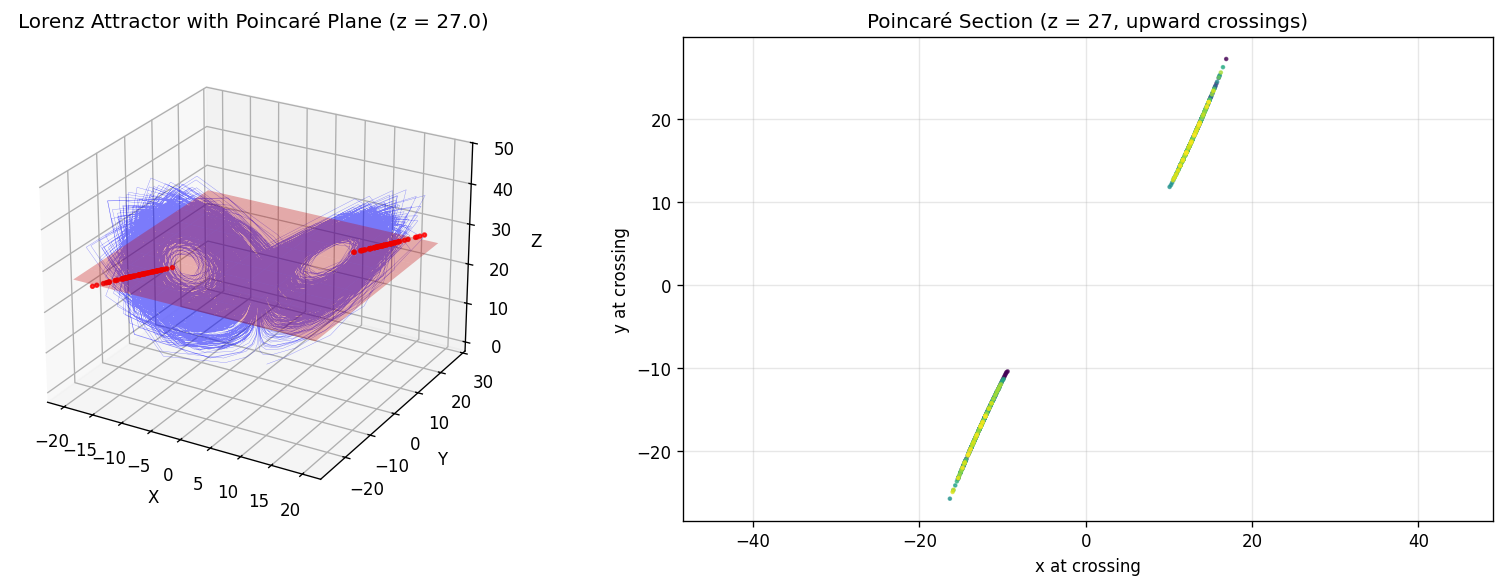

In [10]:
# Visualize Poincaré section
fig = plt.figure(figsize=(14, 5))

# Left: 3D view with cutting plane
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(traj[0][::20], traj[1][::20], traj[2][::20], 'b-', lw=0.2, alpha=0.5)

# Draw the Poincaré plane
xx, yy = np.meshgrid(np.linspace(-20, 20, 10), np.linspace(-25, 25, 10))
zz = np.ones_like(xx) * z_section
ax1.plot_surface(xx, yy, zz, alpha=0.3, color='red')

# Mark intersection points
ax1.scatter(px[::5], py[::5], [z_section]*len(px[::5]), c='red', s=5, alpha=0.8)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title(f'Lorenz Attractor with Poincaré Plane (z = {z_section})')
ax1.view_init(elev=25, azim=-60)

# Right: The Poincaré section itself (2D projection)
ax2 = fig.add_subplot(122)
ax2.scatter(px, py, c=range(len(px)), cmap='viridis', s=3, alpha=0.7)
ax2.set_xlabel('x at crossing')
ax2.set_ylabel('y at crossing')
ax2.set_title('Poincaré Section (z = 27, upward crossings)')
ax2.set_aspect('equal', 'datalim')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### The Lorenz Map: A 1D Reduction

We can go further! The Poincaré section has a remarkable structure that collapses nearly to a 1D curve. 

Plot successive maxima of z(t): $z_{n+1}$ vs $z_n$ — this is the **Lorenz map**:

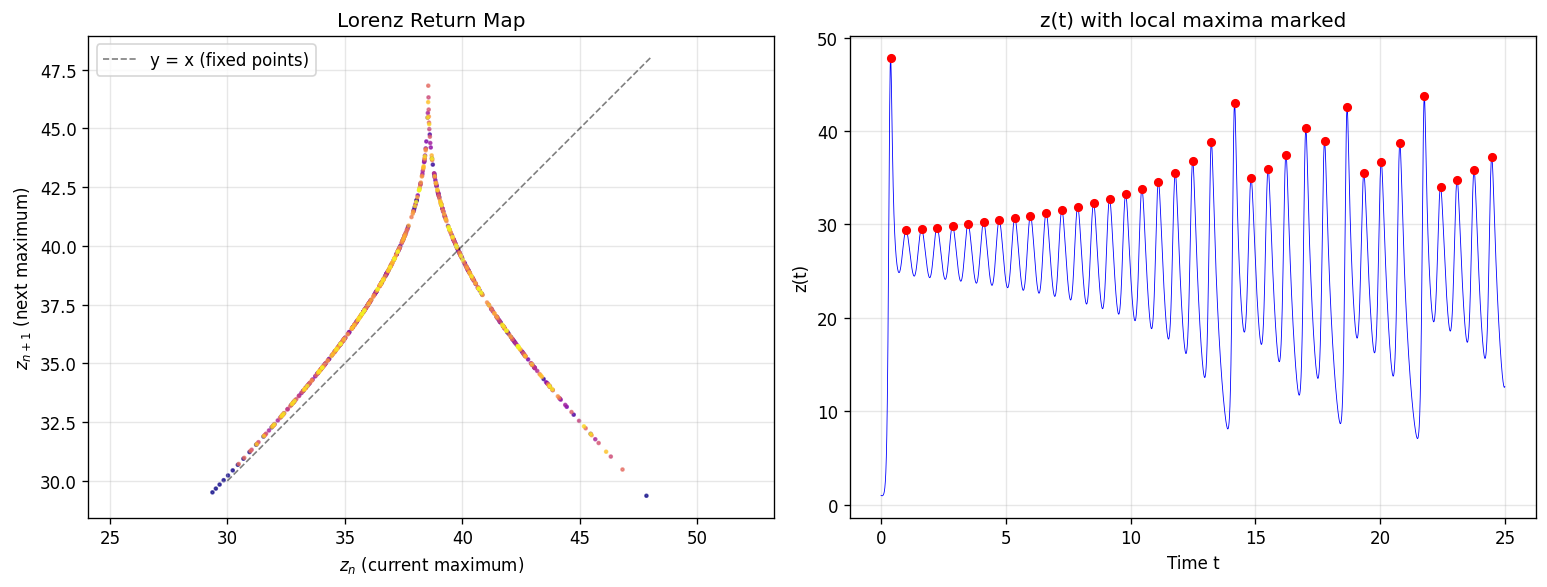

The Lorenz map is nearly 1D — chaos in 3D reduces to iteration of a 1D map!


In [11]:
# Find local maxima of z(t) to construct Lorenz map
from scipy.signal import find_peaks

z_trajectory = traj[2]
peaks_idx, _ = find_peaks(z_trajectory, height=20)  # Find z maxima
z_maxima = z_trajectory[peaks_idx]

# Lorenz return map: z_{n+1} vs z_n
z_n = z_maxima[:-1]
z_n1 = z_maxima[1:]

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Left: The Lorenz map
axes[0].scatter(z_n, z_n1, c=range(len(z_n)), cmap='plasma', s=3, alpha=0.7)
axes[0].plot([30, 48], [30, 48], 'k--', lw=1, alpha=0.5, label='y = x (fixed points)')
axes[0].set_xlabel(r'$z_n$ (current maximum)')
axes[0].set_ylabel(r'$z_{n+1}$ (next maximum)')
axes[0].set_title('Lorenz Return Map')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal', 'datalim')

# Right: Time series of z showing the maxima
t_short = t_eval_long[:5000]
z_short = z_trajectory[:5000]
peaks_short = peaks_idx[peaks_idx < 5000]

axes[1].plot(t_short, z_short, 'b-', lw=0.5)
axes[1].scatter(t_short[peaks_short], z_short[peaks_short], c='red', s=20, zorder=5)
axes[1].set_xlabel('Time t')
axes[1].set_ylabel('z(t)')
axes[1].set_title('z(t) with local maxima marked')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"The Lorenz map is nearly 1D — chaos in 3D reduces to iteration of a 1D map!")

---
## 7. Feigenbaum Cascades — The Road to Chaos

### Period-Doubling Route to Chaos

One of the most remarkable discoveries in chaos theory is that many systems follow the **same universal route** to chaos:

1. Stable fixed point → Period-2 cycle → Period-4 → Period-8 → ... → **Chaos**

The ratios of parameter intervals between successive period-doublings converge to the **Feigenbaum constant**:

$$\delta = \lim_{n \to \infty} \frac{r_{n} - r_{n-1}}{r_{n+1} - r_n} \approx 4.669...$$

This is a **universal constant** — it appears in the logistic map, Lorenz system, Van der Pol oscillator, and countless other systems!

### The Logistic Map — Simplest Example

The discrete logistic map $x_{n+1} = r \cdot x_n (1 - x_n)$ displays the full cascade:

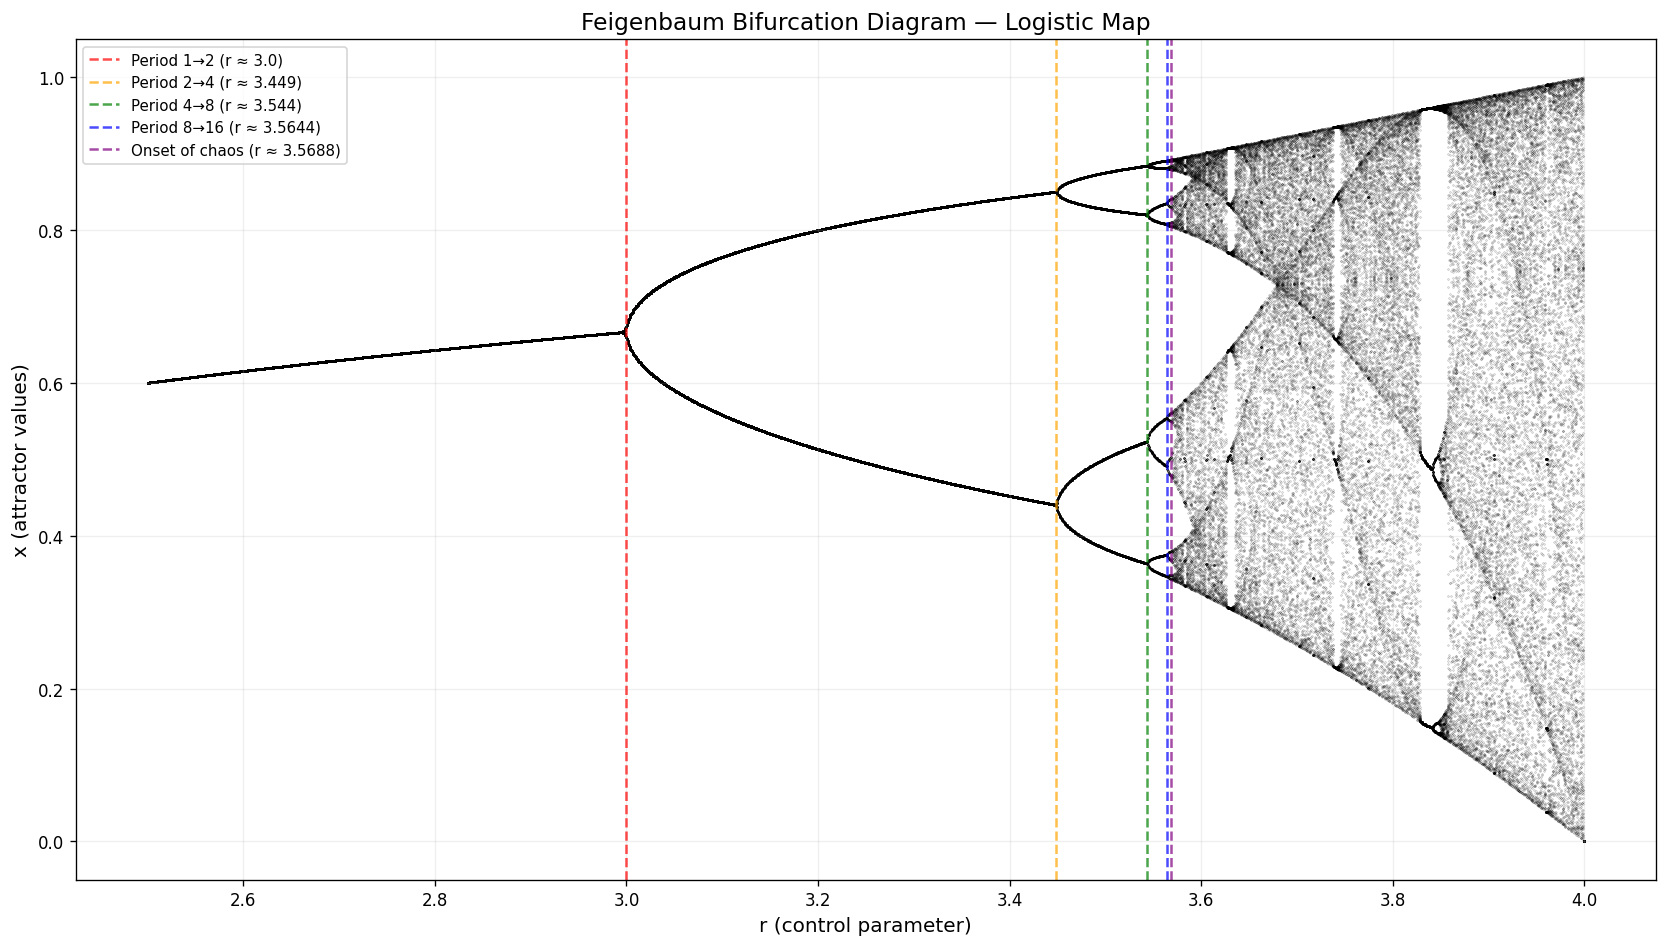

In [12]:
# Feigenbaum / Bifurcation diagram for the Logistic Map
def logistic_bifurcation(r_values, n_iterations=1000, n_last=100):
    """
    Compute bifurcation diagram for logistic map x_{n+1} = r * x_n * (1 - x_n)
    """
    r_list = []
    x_list = []
    
    for r in r_values:
        x = 0.5  # Initial condition
        # Transient iterations (let it settle)
        for _ in range(n_iterations - n_last):
            x = r * x * (1 - x)
        # Collect last n_last points
        for _ in range(n_last):
            x = r * x * (1 - x)
            r_list.append(r)
            x_list.append(x)
            
    return np.array(r_list), np.array(x_list)

# Compute bifurcation diagram
r_values = np.linspace(2.5, 4.0, 2000)
r_bif, x_bif = logistic_bifurcation(r_values)

fig, ax = plt.subplots(figsize=(14, 8))
ax.scatter(r_bif, x_bif, s=0.1, c='black', alpha=0.3)

# Mark key bifurcation points
bifurcation_points = [3.0, 3.449, 3.544, 3.5644, 3.5688]  # Approximate
colors = ['red', 'orange', 'green', 'blue', 'purple']
labels = ['Period 1→2', 'Period 2→4', 'Period 4→8', 'Period 8→16', 'Onset of chaos']

for bp, c, lab in zip(bifurcation_points, colors, labels):
    ax.axvline(x=bp, color=c, linestyle='--', alpha=0.7, lw=1.5, label=f'{lab} (r ≈ {bp})')

ax.set_xlabel('r (control parameter)', fontsize=12)
ax.set_ylabel('x (attractor values)', fontsize=12)
ax.set_title('Feigenbaum Bifurcation Diagram — Logistic Map', fontsize=14)
ax.legend(loc='upper left', fontsize=9)
ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

In [14]:
# Compute Feigenbaum constant from bifurcation points
# More precise values for period-doubling bifurcations

# Using known precise values
r_bifurcations = [3.0, 3.4494897, 3.5440903, 3.5644073, 3.5687594, 3.5696916]

print("Period-Doubling Bifurcation Analysis")
print("=" * 50)
print(f"{'Transition':<20} {'r value':<15} {'Δr':<12} {'δ (ratio)'}")
print("-" * 50)

for i in range(len(r_bifurcations) - 1):
    delta_r = r_bifurcations[i+1] - r_bifurcations[i]
    if i > 0:
        prev_delta = r_bifurcations[i] - r_bifurcations[i-1]
        ratio = prev_delta / delta_r
        print(f"Period {2**i} → {2**(i+1):<10} {r_bifurcations[i+1]:<15.7f} {delta_r:<12.7f} {ratio:.4f}")
    else:
        print(f"Period {2**i} → {2**(i+1):<10} {r_bifurcations[i+1]:<15.7f} {delta_r:<12.7f} {'---':>8}")

print("-" * 50)
print(f"\nFeigenbaum constant δ ≈ 4.6692016... (universal!)")
print(f"Feigenbaum α constant ≈ 2.5029078... (scaling of orbits)")

Period-Doubling Bifurcation Analysis
Transition           r value         Δr           δ (ratio)
--------------------------------------------------
Period 1 → 2          3.4494897       0.4494897         ---
Period 2 → 4          3.5440903       0.0946006    4.7514
Period 4 → 8          3.5644073       0.0203170    4.6562
Period 8 → 16         3.5687594       0.0043521    4.6683
Period 16 → 32         3.5696916       0.0009322    4.6686
--------------------------------------------------

Feigenbaum constant δ ≈ 4.6692016... (universal!)
Feigenbaum α constant ≈ 2.5029078... (scaling of orbits)


### Self-Similarity in the Bifurcation Diagram

A stunning feature of the Feigenbaum cascade is **self-similarity** — zoom into the diagram and you see the same structure repeated at smaller scales:

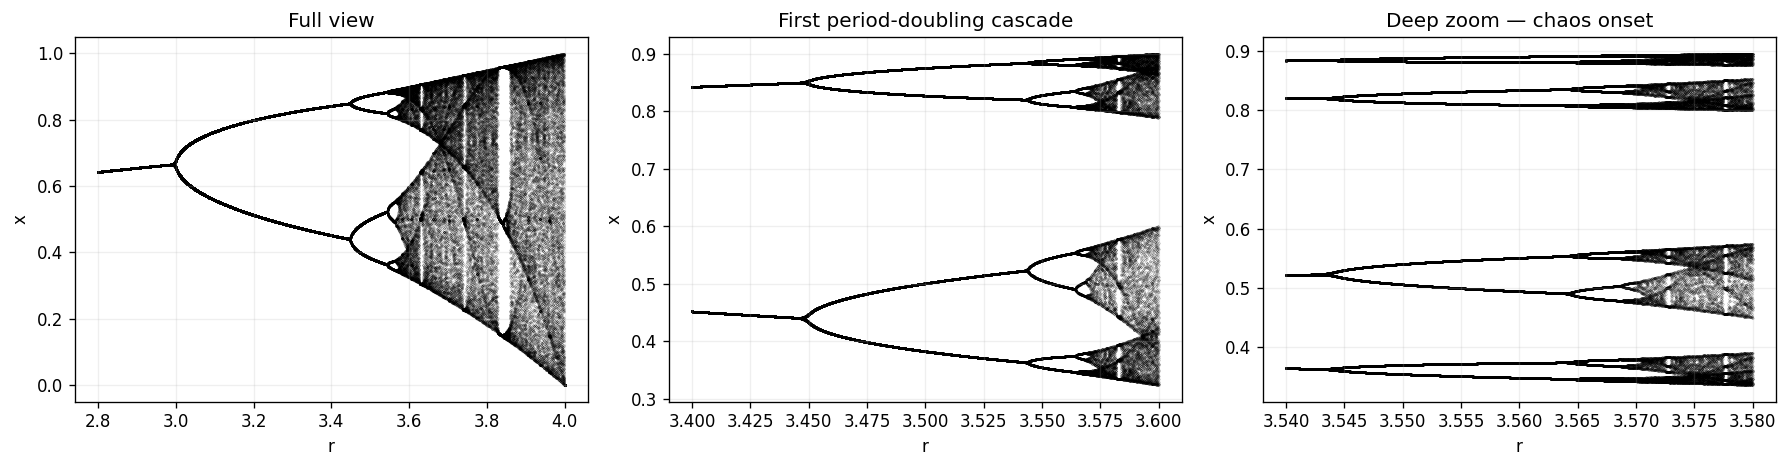

Notice: The same branching structure appears at every scale — this is fractal self-similarity!


In [15]:
# Zoom into the bifurcation diagram to show self-similarity
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Different zoom levels
zoom_ranges = [
    (2.8, 4.0, "Full view"),
    (3.4, 3.6, "First period-doubling cascade"),
    (3.54, 3.58, "Deep zoom — chaos onset")
]

for ax, (r_min, r_max, title) in zip(axes, zoom_ranges):
    r_vals = np.linspace(r_min, r_max, 1500)
    r_b, x_b = logistic_bifurcation(r_vals, n_iterations=500, n_last=100)
    ax.scatter(r_b, x_b, s=0.05, c='black', alpha=0.4)
    ax.set_xlabel('r')
    ax.set_ylabel('x')
    ax.set_title(title)
    ax.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

print("Notice: The same branching structure appears at every scale — this is fractal self-similarity!")

### Feigenbaum Cascade in the Lorenz System

The Lorenz system also exhibits period-doubling! As we vary $\rho$, we see:
- $\rho < 24.74$: Stable fixed points
- $\rho \approx 24.74$: Hopf bifurcation → limit cycle
- Further increases: Period-doubling cascade → Chaos

Let's visualize how the Lorenz attractor changes with ρ:

Computing Lorenz bifurcation: 100%|██████████| 300/300 [04:06<00:00,  1.22it/s]


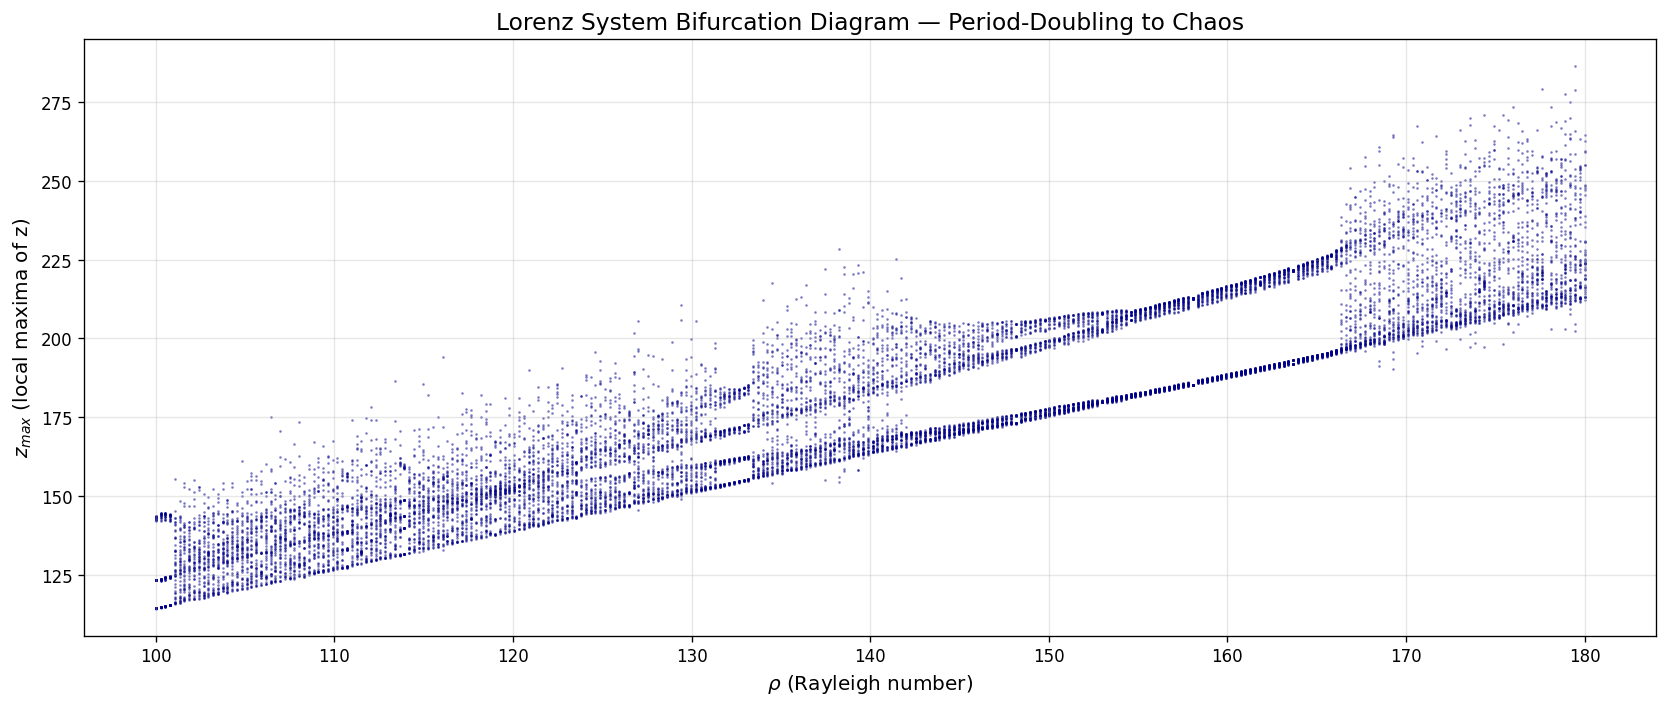

The Feigenbaum cascade is universal — it appears in the Lorenz system too!


In [17]:
# Lorenz bifurcation diagram — z_max vs rho
from tqdm import tqdm

def lorenz_with_rho(t, state, rho):
    x, y, z = state
    sigma, beta = 10.0, 8/3
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

rho_values = np.linspace(100, 180, 300)  # Range showing period-doubling
rho_list = []
z_max_list = []

for rho in tqdm(rho_values, desc="Computing Lorenz bifurcation"):
    # Integrate
    t_span = (0, 300)
    sol = solve_ivp(lambda t, y: lorenz_with_rho(t, y, rho), t_span, 
                    [1.0, 1.0, 1.0], max_step=0.02)
    
    # Find z maxima (after transient)
    z = sol.y[2]
    t = sol.t
    transient_idx = np.searchsorted(t, 100)  # Skip first 100 time units
    z_after = z[transient_idx:]
    
    peaks_idx, _ = find_peaks(z_after, height=50)
    z_maxima = z_after[peaks_idx]
    
    # Store last 50 maxima
    for zm in z_maxima[-50:]:
        rho_list.append(rho)
        z_max_list.append(zm)

fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(rho_list, z_max_list, s=0.3, c='darkblue', alpha=0.5)
ax.set_xlabel(r'$\rho$ (Rayleigh number)', fontsize=12)
ax.set_ylabel(r'$z_{max}$ (local maxima of z)', fontsize=12)
ax.set_title('Lorenz System Bifurcation Diagram — Period-Doubling to Chaos', fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("The Feigenbaum cascade is universal — it appears in the Lorenz system too!")

---
## 8. Summary: Key Insights

| Concept | Description |
|---------|-------------|
| **Sensitive Dependence** | Tiny differences in initial conditions grow exponentially (Lyapunov exponent λ > 0) |
| **Practical Unpredictability** | Although solutions are mathematically unique, finite precision makes long-term prediction impossible |
| **Poincaré Sections** | Reduce continuous 3D flow to discrete 2D maps, revealing attractor structure |
| **Lorenz Map** | Further reduction to 1D — the "tent map" structure explains chaos |
| **Feigenbaum Universality** | Period-doubling cascades follow universal ratios (δ ≈ 4.669) regardless of system |
| **Self-Similarity** | Bifurcation diagrams exhibit fractal structure at all scales |

### The Deep Message

Chaos is not randomness — it's **deterministic unpredictability**. The equations are perfectly deterministic, but practical prediction is limited because:

1. We can never know initial conditions perfectly
2. Errors amplify exponentially
3. After a finite "prediction horizon," our forecasts become useless

This explains why weather prediction is fundamentally limited to ~2 weeks, despite perfect knowledge of atmospheric physics!

---
## 5. Running Manim Animations

The project includes `manim_scenes.py` with ready-made Manim Community scenes.

### From the terminal:
```bash
# Low-quality preview (fast)
manim -pql manim_scenes.py VanDerPolScene

# High-quality render
manim -pqh manim_scenes.py VanDerPolScene

# Lorenz attractor scene
manim -pql manim_scenes.py LorenzAttractorScene

# All scenes
manim -pql manim_scenes.py
```

Videos are saved to `media/videos/`.

---
## 6. Next Steps

- Experiment with different **μ** values in Van der Pol
- Modify Lorenz parameters to see **bifurcations**
- Add interactive widgets (`ipywidgets`) for parameter exploration
- Extend Manim scenes with color gradients, annotations, and camera movements

Happy exploring! 🚀